# Tarea K-medias

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano.

El algoritmo más común utiliza una técnica de refinamiento iterativo. Debido a su ubicuidad a menudo se llama el algoritmo k-medias, también se le conoce como algoritmo de Lloyd, sobre todo en la comunidad informática.

Dado un conjunto inicial de k centroides $m1(1),…,mk(1)$, el algoritmo continúa alternando entre dos pasos:

Paso de asignación: Asigna cada observación al grupo con la media más cercana (es decir, la partición de las observaciones de acuerdo con el diagrama de Voronoi generado por los centroides).

${\displaystyle S_{i}^{(t)}={\big \{}x_{p}:{\big \|}x_{p}-m_{i}^{(t)}{\big \|}\leq {\big \|}x_{p}-m_{j}^{(t)}{\big \|}\ \forall \ 1\leq j\leq k{\big \}}}$

Donde cada ${\displaystyle x_{p}}x_{p}$ va exactamente dentro de un ${\displaystyle S_{i}^{(t)}}S^{(t)}_i$, incluso aunque pudiera ir en dos de ellos.
Paso de actualización: Calcular los nuevos centroides como el centroide de las observaciones en el grupo.

${\displaystyle \mathbf {m} _{i}^{(t+1)}={\frac {1}{|S_{i}^{(t)}|}}\sum _{\mathbf {x} _{j}\in S_{i}^{(t)}}\mathbf {x} _{j}}$

In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats

def distance(x2,x1,y2,y1,n_dis = "e"):
  """ Función para encontrar las distancias entre dos puntos
  "e" - Euclideana
  "m" - Manhattan
  "c" - Canberra """
  if n_dis == "e": #EUCLIDEANA
    distancia = ((x2-x1)**2 + (y2-y1)**2)**(1/2)
    return distancia
  if n_dis == "m": #MANHATTAN
    distancia = abs(x2-x1) + abs(y2-y1)
    return distancia
  if n_dis == "c": #CANBERRA
    distancia = (abs(x2-x1)+abs(y2-y1))/(abs(x2)+abs(x1)+abs(y2)+abs(y1))
    return distancia 

def tarea_kmeans_1(k, samp, print_distances = False):
  print("---------------- k = ",k,"-----------------")
  X = np.array(samp)
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  print("Los centroides cuando k = ", k)
  print(kmeans.cluster_centers_)

  fig = plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow',linewidths=1)
  plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='y',linewidths=10,edgecolors="black", )
  
  list_count = [0]
  for i in range(k):
    print("Cuando k = ",i, " el grupo es de:", np.count_nonzero(kmeans.labels_ == i))
    list_count.append(np.count_nonzero(kmeans.labels_ == i))
  for b in range(k):
    if print_distances == True:
      print("CLASE: ", b)
    all_index= []
    index = []
    for j in range(len(X)):
      
      if kmeans.labels_[j] == b:
        index.append(j)
        # print(index)
    all_index.append(index)
    # print(len(all_index[0]))
    # print(all_index)
    X2 = X.tolist()
    list_auxiliar = []
    # print(len(all_index))
    list_3 = []
    for o in range(len(all_index[0])):
      
      x2 = (X2[all_index[0][o]][0])
      y2 = (X2[all_index[0][o]][1])
      x1 = kmeans.cluster_centers_[b][0]
      y1 = kmeans.cluster_centers_[b][1]
      list_3.append(distance(x2,x1,y2,y1))

    if print_distances == True:  
      print("Distancia esperada: ", np.mean(list_3))
      print("Distancia máxima: ", np.min(list_3))
      print("Distancia máxima: ", np.max(list_3))


def tarea_kmeans_2(k, samp, sort = False, normal = False):
  print("---------------- k = ",k,"-----------------")
  X = np.array(samp)
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  # print("Los centroides cuando k = ", k)
  # print(kmeans.cluster_centers_)
  for b in range(k):
    print(b)
    all_index= []
    index = []
    for j in range(len(X)):
      
      if kmeans.labels_[j] == b:
        index.append(j)
        # print(index)
    all_index.append(index)
    # print(len(all_index[0]))
    # print(all_index)
    X2 = X.tolist()
    list_auxiliar = []
    # print(len(all_index))
    list_3 = []
    for o in range(len(all_index[0])):
      
      x2 = (X2[all_index[0][o]][0])
      y2 = (X2[all_index[0][o]][1])
      x1 = kmeans.cluster_centers_[b][0]
      y1 = kmeans.cluster_centers_[b][1]
      list_3.append(distance(x2,x1,y2,y1))
      if sort == True:
        list_3.sort()
    # print("Distancia esperada: ", np.mean(list_3))
    # print("Distancia máxima: ", np.min(list_3))
    # print("Distancia máxima: ", np.max(list_3))
    plt.scatter(list(range(0, len(list_3))),list_3)
    plt.show()

 

## PERÍMETRO DEL CÍRCULO CON 360 PUNTOS

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t)
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles

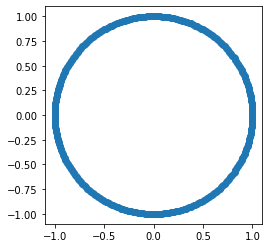

In [3]:
r = [1]
n = [360]
circles = circle_points(r, n)

fig, ax = plt.subplots()
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.show()

### CLUSTERS DE DISTRIBUCIÓN PERIMETRAL DE PUNTOS EN UN CÍRCULO

---------------- k =  10 -----------------
Los centroides cuando k =  10
[[ 0.56470704 -0.80648523]
 [-0.06005004  0.98180943]
 [-0.94151711 -0.28785067]
 [ 0.93105009  0.311525  ]
 [-0.5988046  -0.78037735]
 [-0.61958901  0.7651287 ]
 [ 0.92918658 -0.3199446 ]
 [ 0.54188354  0.81869672]
 [-0.01715095 -0.98257727]
 [-0.94315337  0.28835092]]
Cuando k =  0  el grupo es de: 35
Cuando k =  1  el grupo es de: 36
Cuando k =  2  el grupo es de: 35
Cuando k =  3  el grupo es de: 38
Cuando k =  4  el grupo es de: 36
Cuando k =  5  el grupo es de: 35
Cuando k =  6  el grupo es de: 37
Cuando k =  7  el grupo es de: 38
Cuando k =  8  el grupo es de: 37
Cuando k =  9  el grupo es de: 33
CLASE:  0
Distancia esperada:  0.1528407980191398
Distancia máxima:  0.01546332182438462
Distancia máxima:  0.2937316039419261
CLASE:  1
Distancia esperada:  0.1572089419969609
Distancia máxima:  0.01850467138324869
Distancia máxima:  0.30219135292688903
CLASE:  2
Distancia esperada:  0.15284079801913983
Distancia 

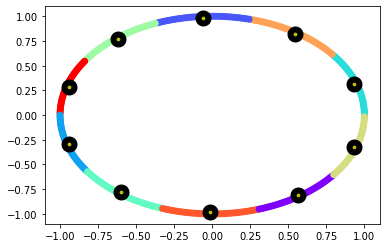

In [9]:
tarea_kmeans_1(10,circle,True)

---------------- k =  2 -----------------
Los centroides cuando k =  2
[[-0.56974014  0.28406196]
 [ 0.56974014 -0.28406196]]
Cuando k =  0  el grupo es de: 180
Cuando k =  1  el grupo es de: 180


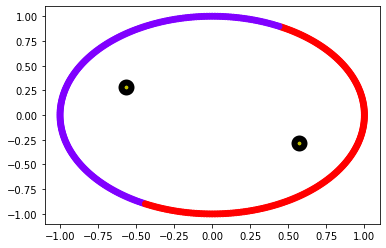

In [ ]:
tarea_kmeans_1(2,circle)

---------------- k =  3 -----------------
Los centroides cuando k =  3
[[ 0.64721995 -0.51482199]
 [-0.7694589  -0.30309792]
 [ 0.12223895  0.81791992]]
Cuando k =  0  el grupo es de: 120
Cuando k =  1  el grupo es de: 120
Cuando k =  2  el grupo es de: 120


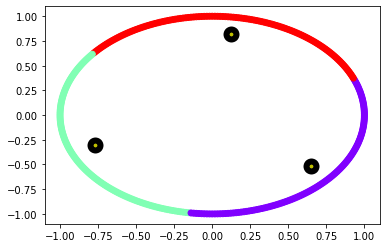

In [ ]:
tarea_kmeans_1(3,circle)

---------------- k =  4 -----------------
Los centroides cuando k =  4
[[ 0.34454051  0.83179437]
 [-0.35900485 -0.82565463]
 [ 0.82677033 -0.35094319]
 [-0.83072258  0.35262082]]
Cuando k =  0  el grupo es de: 90
Cuando k =  1  el grupo es de: 90
Cuando k =  2  el grupo es de: 91
Cuando k =  3  el grupo es de: 89


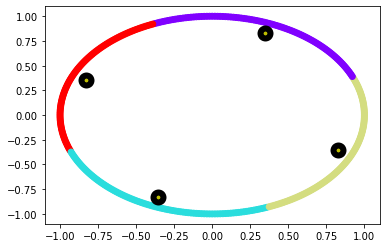

In [ ]:
tarea_kmeans_1(4,circle)

---------------- k =  5 -----------------
Los centroides cuando k =  5
[[ 0.91954786 -0.1621411 ]
 [-0.85126982 -0.38794601]
 [ 0.44001058  0.82753954]
 [-0.63920058  0.6854587 ]
 [ 0.11379347 -0.92677346]]
Cuando k =  0  el grupo es de: 73
Cuando k =  1  el grupo es de: 72
Cuando k =  2  el grupo es de: 71
Cuando k =  3  el grupo es de: 71
Cuando k =  4  el grupo es de: 73


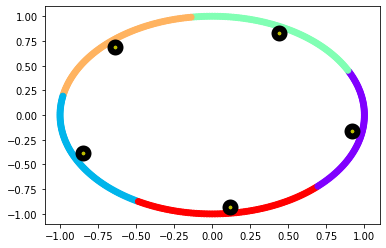

In [ ]:
tarea_kmeans_1(5,circle)

---------------- k =  10 -----------------
Los centroides cuando k =  10
[[-0.8280292   0.52751278]
 [ 0.80500278 -0.56366902]
 [-0.76036238 -0.62679437]
 [ 0.29578749  0.93811808]
 [ 0.98330706  0.0257488 ]
 [ 0.31211486 -0.93281299]
 [-0.32772662  0.92547142]
 [-0.98061188 -0.07717583]
 [-0.27987001 -0.94482533]
 [ 0.78628595  0.59250896]]
Cuando k =  0  el grupo es de: 38
Cuando k =  1  el grupo es de: 37
Cuando k =  2  el grupo es de: 34
Cuando k =  3  el grupo es de: 36
Cuando k =  4  el grupo es de: 36
Cuando k =  5  el grupo es de: 36
Cuando k =  6  el grupo es de: 38
Cuando k =  7  el grupo es de: 36
Cuando k =  8  el grupo es de: 34
Cuando k =  9  el grupo es de: 35


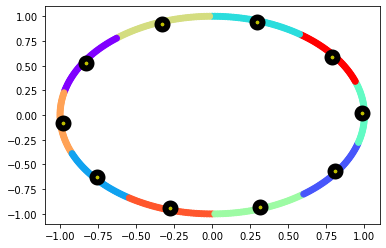

In [ ]:
tarea_kmeans_1(10,circle)

### HISTOGRAMA DE CADA PUNTO Y SU DISTANCIA

---------------- k =  1 -----------------
0


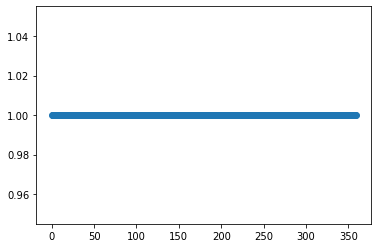

---------------- k =  2 -----------------
0


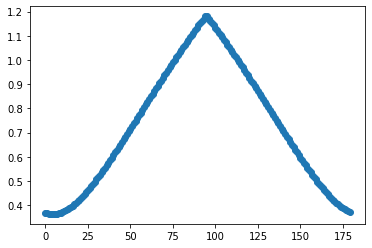

1


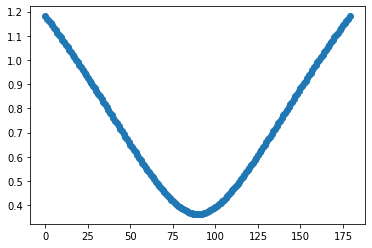

---------------- k =  3 -----------------
0


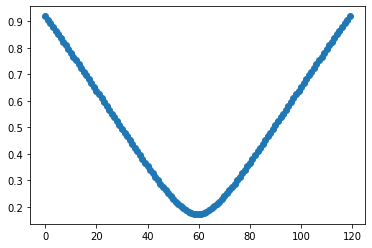

1


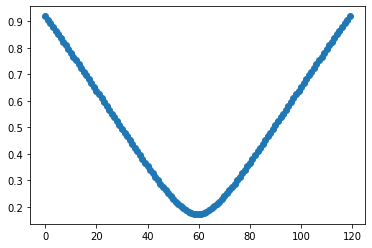

2


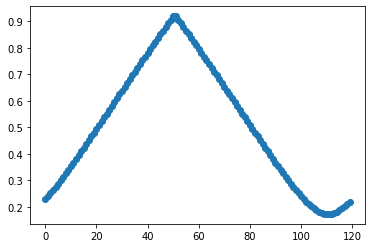

---------------- k =  4 -----------------
0


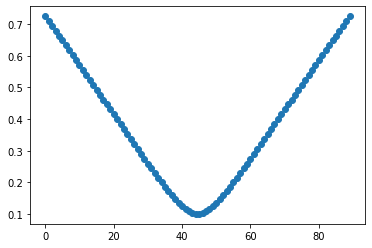

1


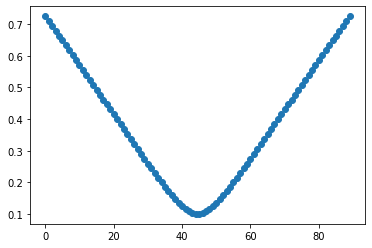

2


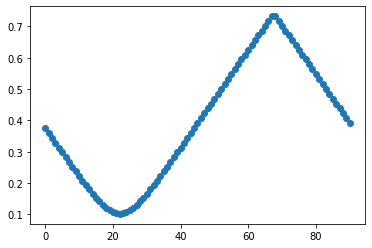

3


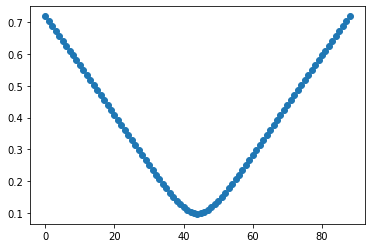

In [ ]:
for i in range(1,5):
  tarea_kmeans_2(i, circle, sort=False, normal=False)

## PERÍMETRO DEL CÍRCULO CON PUNTOS Y UN PUNTO EN SU CENTRO

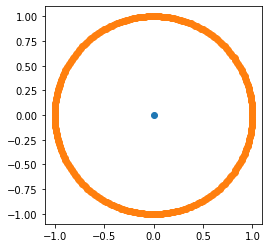

In [ ]:
r = [0, 1]
n = [1, 360]
circles = circle_points(r, n)
fig, ax = plt.subplots()
list_circle = []
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1])
ax.set_aspect('equal')
plt.show()

circle2 = circle.tolist()
circle2.append([0,0])
# circle

### CLUSTERS DE DISTRIBUCIÓN PERIMETRAL DE PUNTOS EN UN CÍRCULO

---------------- k =  2 -----------------
Los centroides cuando k =  2
[[ 0.21133665  0.59679629]
 [-0.21251074 -0.60011183]]
Cuando k =  0  el grupo es de: 181
Cuando k =  1  el grupo es de: 180


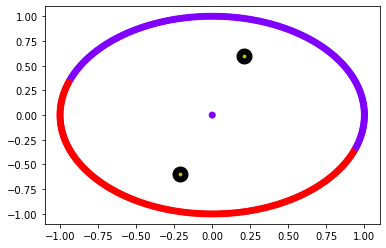

In [ ]:
tarea_kmeans_1(2,circle2)

---------------- k =  3 -----------------
Los centroides cuando k =  3
[[-0.81040149 -0.16487805]
 [ 0.26024347  0.77778576]
 [ 0.54798932 -0.61938926]]
Cuando k =  0  el grupo es de: 120
Cuando k =  1  el grupo es de: 121
Cuando k =  2  el grupo es de: 120


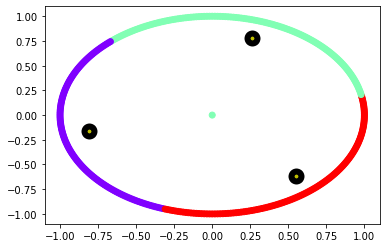

In [ ]:
tarea_kmeans_1(3,circle2)

---------------- k =  4 -----------------
Los centroides cuando k =  4
[[ 0.10191999  0.89454031]
 [-0.08629259 -0.89618281]
 [-0.88354102  0.0928639 ]
 [ 0.89752031 -0.09433319]]
Cuando k =  0  el grupo es de: 90
Cuando k =  1  el grupo es de: 90
Cuando k =  2  el grupo es de: 92
Cuando k =  3  el grupo es de: 89


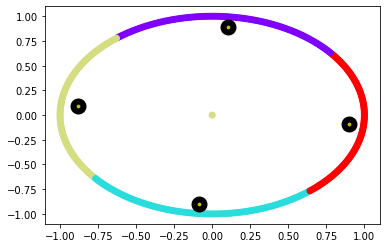

In [ ]:
tarea_kmeans_1(4,circle2)

---------------- k =  5 -----------------
Los centroides cuando k =  5
[[ 0.84624982  0.39461277]
 [-0.47480273 -0.80605508]
 [-0.11422162  0.93026041]
 [ 0.61634647 -0.6845221 ]
 [-0.91676542  0.1948645 ]]
Cuando k =  0  el grupo es de: 73
Cuando k =  1  el grupo es de: 72
Cuando k =  2  el grupo es de: 71
Cuando k =  3  el grupo es de: 74
Cuando k =  4  el grupo es de: 71


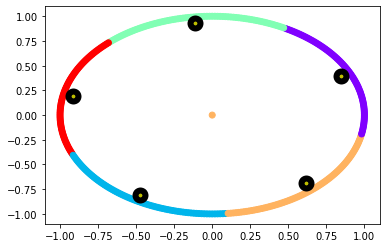

In [ ]:
tarea_kmeans_1(5,circle2)

---------------- k =  15 -----------------
Los centroides cuando k =  15
[[ 0.73190834 -0.67067042]
 [-0.9446957   0.30695024]
 [ 0.42624533  0.89364192]
 [-0.50250937 -0.85309162]
 [ 0.97858726  0.154993  ]
 [-0.02595326  0.99111484]
 [-0.05185371 -0.98942763]
 [-0.84023373 -0.52503631]
 [-0.44294851  0.88841727]
 [ 0.94556704 -0.29813614]
 [ 0.          0.        ]
 [-0.98666388 -0.10370255]
 [ 0.79589176  0.58892892]
 [ 0.38764385 -0.91323167]
 [-0.7557529   0.64547395]]
Cuando k =  0  el grupo es de: 24
Cuando k =  1  el grupo es de: 23
Cuando k =  2  el grupo es de: 28
Cuando k =  3  el grupo es de: 28
Cuando k =  4  el grupo es de: 27
Cuando k =  5  el grupo es de: 26
Cuando k =  6  el grupo es de: 27
Cuando k =  7  el grupo es de: 27
Cuando k =  8  el grupo es de: 24
Cuando k =  9  el grupo es de: 26
Cuando k =  10  el grupo es de: 1
Cuando k =  11  el grupo es de: 25
Cuando k =  12  el grupo es de: 28
Cuando k =  13  el grupo es de: 25
Cuando k =  14  el grupo es de: 22


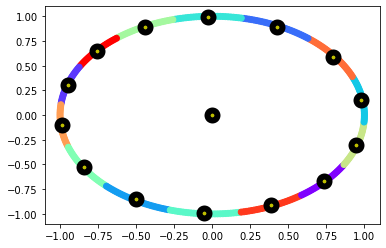

In [ ]:
tarea_kmeans_1(15, circle2)

### HISTOGRAMA DE CADA PUNTO Y SU DISTANCIA

---------------- k =  1 -----------------
0


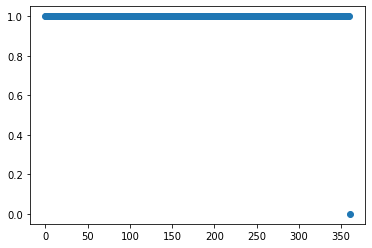

---------------- k =  2 -----------------
0


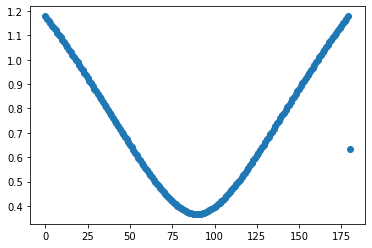

1


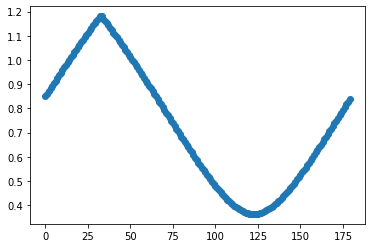

---------------- k =  3 -----------------
0


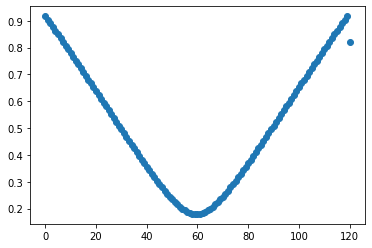

1


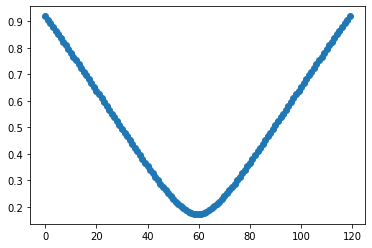

2


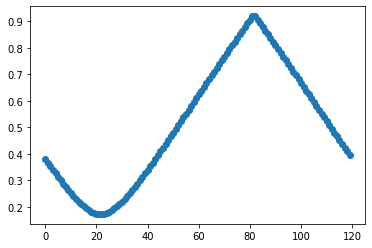

---------------- k =  4 -----------------
0


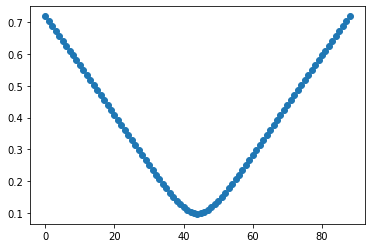

1


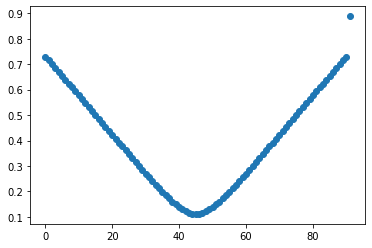

2


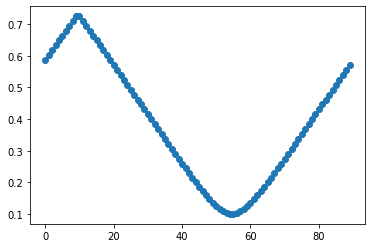

3


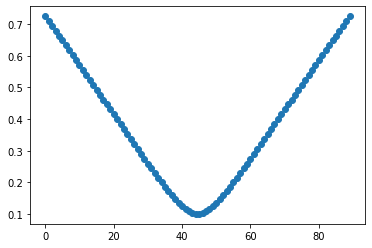

In [ ]:
for i in range(1,5):
  tarea_kmeans_2(i, circle2, sort=False, normal=False)

## DISTRIBUCIÓN DE PUNTOS DENTRO DEL CÍRCULO

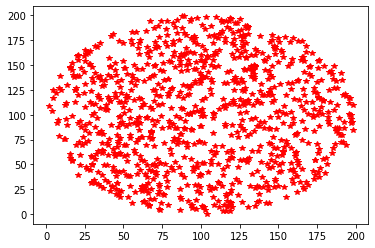

In [ ]:
import random
import matplotlib.pyplot as plt


def getRandomPointInCircle(num, radius, centerx, centery):
    samplePoint = []
    for i in range(num):
        while True:
            x = random.uniform(-radius, radius)
            y = random.uniform(-radius, radius)
            if (x ** 2) + (y ** 2) <= (radius ** 2):
                samplePoint.append((int(x) + centerx, int(y) + centery))
                break

        plt.plot(x + centerx, y + centery, '*', color="red")

    return samplePoint


num = 1000
radius = 100
centerx,centery = 100,100
samp = getRandomPointInCircle(num, radius, centerx, centery)
# print("sample point" , samp)
# plt.legend()
plt.show()

### CLUSTERING

---------------- k =  1 -----------------
Los centroides cuando k =  1
[[ 97.766 100.742]]
Cuando k =  0  el grupo es de: 1000
CLASE:  0
Distancia esperada:  65.3086604968617
Distancia máxima:  1.2795780554541882
Distancia máxima:  101.38866465241566


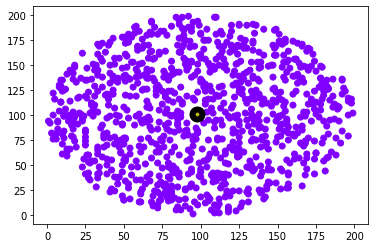

In [ ]:
tarea_kmeans_1(1)

---------------- k =  1 -----------------
0


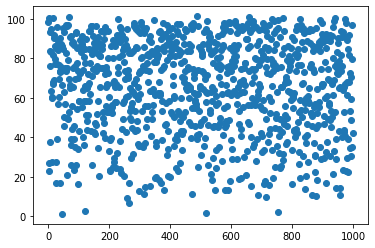

In [ ]:
tarea_kmeans_2(1)

---------------- k =  2 -----------------
Los centroides cuando k =  2
[[ 69.23123732  68.22109533]
 [125.51282051 132.36489152]]
Cuando k =  0  el grupo es de: 492
Cuando k =  1  el grupo es de: 508
CLASE:  0
Distancia esperada:  50.65093635174084
Distancia máxima:  3.294060191946901
Distancia máxima:  104.55529764003785
CLASE:  1
Distancia esperada:  50.02090260224528
Distancia máxima:  0.8004415254718722
Distancia máxima:  104.34165582623602


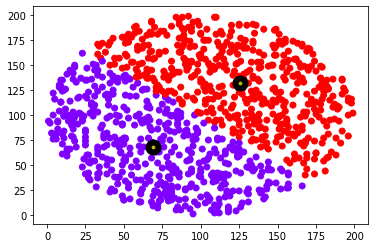

In [ ]:
tarea_kmeans_1(2)

---------------- k =  3 -----------------
Los centroides cuando k =  3
[[ 54.90461538 134.32615385]
 [147.13352273 120.51704545]
 [ 87.09287926  45.3993808 ]]
Cuando k =  0  el grupo es de: 325
Cuando k =  1  el grupo es de: 352
Cuando k =  2  el grupo es de: 323
CLASE:  0
Distancia esperada:  39.86726488101902
Distancia máxima:  1.9026533948224467
Distancia máxima:  84.20130693724903
CLASE:  1
Distancia esperada:  40.020842907293584
Distancia máxima:  3.1062518707278772
Distancia máxima:  83.93311693763185
CLASE:  2
Distancia esperada:  38.388998699854724
Distancia máxima:  3.150657949639755
Distancia máxima:  81.08708590154662


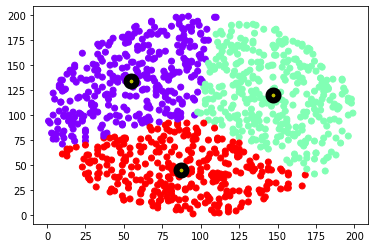

In [ ]:
tarea_kmeans_1(3)

---------------- k =  5 -----------------
Los centroides cuando k =  5
[[121.08163265 158.28061224]
 [ 42.44162437  77.26395939]
 [156.47222222  98.60185185]
 [104.14479638  38.79638009]
 [ 52.11176471 144.85882353]]
Cuando k =  0  el grupo es de: 196
Cuando k =  1  el grupo es de: 197
Cuando k =  2  el grupo es de: 216
Cuando k =  3  el grupo es de: 221
Cuando k =  4  el grupo es de: 170
CLASE:  0
Distancia esperada:  29.757477482068015
Distancia máxima:  3.988977028547301
Distancia máxima:  54.338542894125716
CLASE:  1
Distancia esperada:  30.750447450961932
Distancia máxima:  1.4655904513803972
Distancia máxima:  58.1844235443509
CLASE:  2
Distancia esperada:  31.257293820416038
Distancia máxima:  2.6443575564105553
Distancia máxima:  60.20960330869023
CLASE:  3
Distancia esperada:  30.643367476425393
Distancia máxima:  3.0985300704842302
Distancia máxima:  62.62615490143048
CLASE:  4
Distancia esperada:  27.701103857680007
Distancia máxima:  3.1431641651143467
Distancia máxima:  53

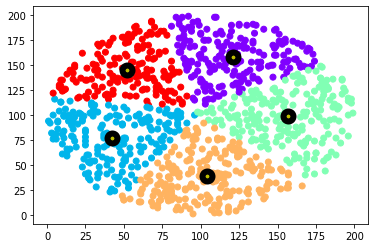

In [ ]:
tarea_kmeans_1(5)

---------------- k =  5 -----------------
0


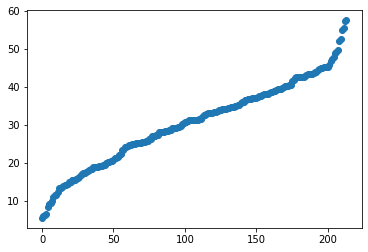

1


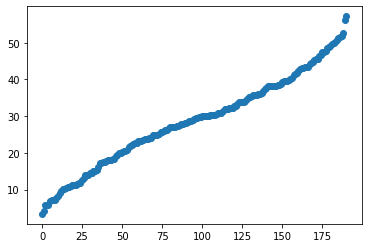

2


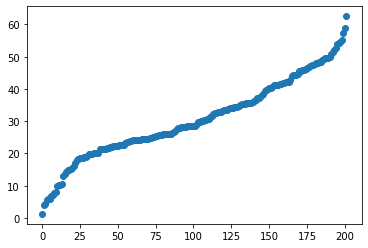

3


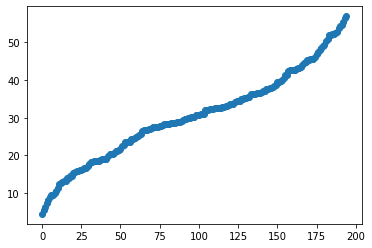

4


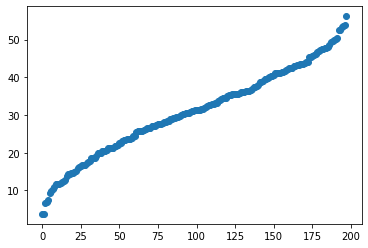

In [ ]:
tarea_kmeans_2(5, True)

---------------- k =  10 -----------------
Los centroides cuando k =  10
[[119.21666667  37.56666667]
 [ 80.85849057 169.06603774]
 [173.77906977 121.60465116]
 [ 26.56        79.5       ]
 [ 37.60550459 135.77981651]
 [122.06315789 107.69473684]
 [162.0625      71.25      ]
 [135.16346154 162.09615385]
 [ 79.52688172  95.        ]
 [ 67.05607477  32.53271028]]
Cuando k =  0  el grupo es de: 120
Cuando k =  1  el grupo es de: 106
Cuando k =  2  el grupo es de: 86
Cuando k =  3  el grupo es de: 100
Cuando k =  4  el grupo es de: 109
Cuando k =  5  el grupo es de: 95
Cuando k =  6  el grupo es de: 80
Cuando k =  7  el grupo es de: 104
Cuando k =  8  el grupo es de: 93
Cuando k =  9  el grupo es de: 107
CLASE:  0
Distancia esperada:  22.749619897367964
Distancia máxima:  2.7205493726248373
Distancia máxima:  39.23308198730024
CLASE:  1
Distancia esperada:  22.227720745013276
Distancia máxima:  4.245513620571341
Distancia máxima:  41.06582209566771
CLASE:  2
Distancia esperada:  19.5664639

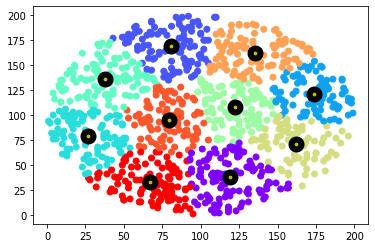

In [ ]:
tarea_kmeans_1(10)

---------------- k =  6 -----------------
Los centroides cuando k =  6
[[ 95.23880597 100.05223881]
 [105.63917526  34.41237113]
 [ 34.96        69.10666667]
 [ 47.55487805 145.41463415]
 [163.43315508  99.25668449]
 [122.25146199 163.06432749]]
Cuando k =  0  el grupo es de: 134
Cuando k =  1  el grupo es de: 194
Cuando k =  2  el grupo es de: 150
Cuando k =  3  el grupo es de: 164
Cuando k =  4  el grupo es de: 187
Cuando k =  5  el grupo es de: 171
CLASE:  0
Distancia esperada:  23.822768101839614
Distancia máxima:  0.7629844322983403
Distancia máxima:  40.89812675550803
CLASE:  1
Distancia esperada:  28.634746297218157
Distancia máxima:  2.751051741410793
Distancia máxima:  60.602994355552916
CLASE:  2
Distancia esperada:  27.27021428364428
Distancia máxima:  2.2508467542486494
Distancia máxima:  56.158106963979485
CLASE:  3
Distancia esperada:  27.51185442783841
Distancia máxima:  2.145171868136179
Distancia máxima:  52.71186571099615
CLASE:  4
Distancia esperada:  29.485708003246

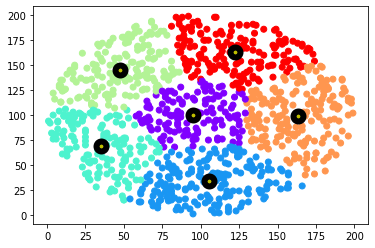

In [ ]:
tarea_kmeans_1(6)